In [2]:
pip install -U scikit-learn


     ---------------------------------------- 7.6/7.6 MB 4.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.2
    Uninstalling scikit-learn-1.1.2:
      Successfully uninstalled scikit-learn-1.1.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\~klearn\\.libs\\vcomp140.dll'
Check the permissions.


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install Plotly pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
pip install Scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
#khai báo thư viện
import pandas as pd #đọc dữ liệu
import datetime as dt #lấy ngày tháng
import matplotlib.pyplot as plt #vẽ biểu đồ
import numpy as np #xử lí dữ liệu
import os #dự liệu hệ thống
import plotly.express as px #vẽ biểu đồ
import seaborn as sns #vẽ biểu đồ
from sklearn.preprocessing import MinMaxScaler #chuẩn hóa dữ liệu
from keras.callbacks import ModelCheckpoint #lưu lại huấn luyện
from tensorflow.keras.models import load_model #tải model

#các lớp để xây dựng mô hình
from keras.models import Sequential #đầu vào
from keras.layers import LSTM #học phụ thuộc
from keras.layers import Dropout #tránh học tủ
from keras.layers import Dense #Đầu ra

#kiểm tra độ chính xác của mô hình
from sklearn.metrics import r2_score #đo mức độ phù hợp
from sklearn.metrics import mean_absolute_error #đo sai số tuyệt đối trung bình
from sklearn.metrics import mean_absolute_percentage_error #đo % sai số trung bình

In [80]:
#đọc dữ liệu
path = ('C:\Python\Data\HÒA PHÁT\source')
df = pd.read_csv(path +'\Dữ liệu Lịch sử HPG.csv')
df

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,04/01/2010,1976.2,1943.8,1976.2,1943.8,14.55M,0.04
1,05/01/2010,2073.4,2073.4,2073.4,1976.2,29.02M,0.05
2,06/01/2010,2138.2,2057.2,2138.2,2041.0,42.73M,0.03
3,07/01/2010,2203.0,2170.6,2235.4,2138.2,37.05M,0.03
4,08/01/2010,2105.8,2251.6,2251.6,2105.8,21.93M,-0.04
...,...,...,...,...,...,...,...
3191,20/10/2022,18100.0,18350.0,18600.0,18050.0,26.03M,-0.02
3192,21/10/2022,16900.0,18300.0,18300.0,16900.0,45.16M,-0.07
3193,24/10/2022,16400.0,NaN,NaN,NaN,NaN,NaN
3194,25/10/2022,17100.0,NaN,NaN,NaN,NaN,NaN


In [81]:
#mô tả dữ liệu
df["Ngày"]=pd.to_datetime(df.Ngày,format="%d/%m/%Y")

In [82]:
#kích thướt dữ liệu
df.shape

(3196, 7)

In [83]:
#kích thướt 5 dòng đầu
df.head(5)

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
0,2010-01-04,1976.2,1943.8,1976.2,1943.8,14.55M,0.04
1,2010-01-05,2073.4,2073.4,2073.4,1976.2,29.02M,0.05
2,2010-01-06,2138.2,2057.2,2138.2,2041.0,42.73M,0.03
3,2010-01-07,2203.0,2170.6,2235.4,2138.2,37.05M,0.03
4,2010-01-08,2105.8,2251.6,2251.6,2105.8,21.93M,-0.04


In [84]:
#kích thướt 5 dòng cuối
df.tail(5)

,Ngày,Lần cuối,Mở,Cao,Thấp,KL,% Thay đổi
3191,2022-10-20,18100.0,18350.0,18600.0,18050.0,26.03M,-0.02
3192,2022-10-21,16900.0,18300.0,18300.0,16900.0,45.16M,-0.07
3193,2022-10-24,16400.0,NaN,NaN,NaN,NaN,NaN
3194,2022-10-25,17100.0,NaN,NaN,NaN,NaN,NaN
3195,2022-10-26,16900.0,NaN,NaN,NaN,NaN,NaN


In [85]:
#kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ngày        3196 non-null   datetime64[ns]
 1   Lần cuối    3196 non-null   float64       
 2   Mở          3193 non-null   float64       
 3   Cao         3193 non-null   float64       
 4   Thấp        3193 non-null   float64       
 5   KL          3193 non-null   object        
 6   % Thay đổi  3193 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 174.9+ KB


In [86]:
#mô tả dữ liệu
df.describe()

,Lần cuối,Mở,Cao,Thấp,% Thay đổi
count,3196.000000,3193.000000,3193.000000,3193.000000,3193.000000
mean,9640.804599,9637.740276,9769.198559,9510.746790,0.000889
std,10158.791962,10178.957766,10317.274147,10034.758681,0.021697
min,793.000000,793.000000,803.200000,777.600000,-0.070000
25%,2073.400000,2081.500000,2105.800000,2057.200000,-0.010000
50%,5100.900000,5083.400000,5126.400000,5025.800000,0.000000
75%,12479.725000,12490.300000,12669.700000,12307.200000,0.010000
max,43895.800000,43895.800000,44198.500000,43517.400000,0.070000


In [87]:
#Tiền xử lí dữ liệu

#lấy dữ liệu
df1=pd.DataFrame(df,columns=['Ngày','Lần cuối'])
df1.index=df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)

In [88]:
#lập biểu đò giá đóng cữa
import plotly.express as px
px.line(df1, y= 'Lần cuối',title='BIỂU ĐỒ GIÁ ĐÓNG CỮA HÒA PHÁT')

In [89]:
df1

,Lần cuối
Ngày,
2010-01-04,1976.2
2010-01-05,2073.4
2010-01-06,2138.2
2010-01-07,2203.0
2010-01-08,2105.8
...,...
2022-10-20,18100.0
2022-10-21,16900.0
2022-10-24,16400.0


In [90]:
#chia tập dữ liệu
data=df1.values
train_data=data[:3000]
test_data=data[3000:]
data

array([[ 1976.2],
       [ 2073.4],
       [ 2138.2],
       ...,
       [16400. ],
       [17100. ],
       [16900. ]])

In [91]:
#chuẩn hóa dữ liệu
sc=MinMaxScaler(feature_range=(0,1))
sc_train=sc.fit_transform(data)

In [92]:
#tạo vòng lặp giá trị
x_train,y_train=[],[]
for i in range(50,len(train_data)):
    x_train.append(sc_train[i-50:i,0])
    y_train.append(sc_train[i,0])


In [93]:
x_train

[array([0.02745065, 0.02970573, 0.03120911, 0.03271249, 0.03045742,
        0.02970573, 0.0278265 , 0.02895404, 0.02820234, 0.02745065,
        0.02594727, 0.02707481, 0.02669896, 0.02557142, 0.02557142,
        0.02632312, 0.02820234, 0.02669896, 0.02594727, 0.02669896,
        0.02857819, 0.02970573, 0.03008157, 0.03008157, 0.02895404,
        0.02895404, 0.02895404, 0.02970573, 0.02970573, 0.03008157,
        0.02970573, 0.02820234, 0.02820234, 0.0278265 , 0.02707481,
        0.0278265 , 0.02895404, 0.02970573, 0.02970573, 0.03008157,
        0.03120911, 0.03120911, 0.0319608 , 0.03346418, 0.03346418,
        0.03308834, 0.03158496, 0.03045742, 0.03158496, 0.03120911]),
 array([0.02970573, 0.03120911, 0.03271249, 0.03045742, 0.02970573,
        0.0278265 , 0.02895404, 0.02820234, 0.02745065, 0.02594727,
        0.02707481, 0.02669896, 0.02557142, 0.02557142, 0.02632312,
        0.02820234, 0.02669896, 0.02594727, 0.02669896, 0.02857819,
        0.02970573, 0.03008157, 0.03008157, 0.

In [94]:
y_train

[0.030457418079567918,
 0.030081572426849296,
 0.030457418079567918,
 0.02932988112141206,
 0.02970572677413068,
 0.02970572677413068,
 0.02932988112141206,
 0.02857818981597483,
 0.02970572677413068,
 0.030457418079567918,
 0.03196080069044238,
 0.03196080069044238,
 0.03233664634316101,
 0.03233664634316101,
 0.03233664634316101,
 0.03233664634316101,
 0.03196080069044238,
 0.03196080069044238,
 0.03271249199587961,
 0.03233664634316101,
 0.03233664634316101,
 0.03233664634316101,
 0.03233664634316101,
 0.033088337648598226,
 0.033464183301316855,
 0.03605798231205397,
 0.036169343986933555,
 0.035380532123203134,
 0.03526685041343021,
 0.03402795178039478,
 0.03402795178039478,
 0.03278673311246601,
 0.032222964633388085,
 0.032222964633388085,
 0.031095427675232237,
 0.031209109385005148,
 0.031209109385005148,
 0.029517803947771374,
 0.029067717178466363,
 0.027487773416112176,
 0.029517803947771374,
 0.02726273003145967,
 0.02726273003145967,
 0.02613519307330382,
 0.027601455125

In [95]:
#xếp dữ liệu thành 1 mảng
x_train=np.array(x_train)
y_train=np.array(y_train)

#xếp lại dữ liệu thành mảng 1 chiều
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
y_train=np.reshape(y_train,(y_train.shape[0],1))

In [96]:
#xây dựng mô hình
model=Sequential()
model.add(LSTM(units=128,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(LSTM(units=64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')

In [97]:
#huấn luyện mô hình
save_model="save_model.hdf5"
best_model=ModelCheckpoint(save_model,monitor='loss',verbose=2,save_best_only=True,mode='auto')
model.fit(x_train,y_train,epochs=150,batch_size=50,verbose=2,callbacks=[best_model])

Epoch 1/150

Epoch 1: loss improved from inf to 0.03548, saving model to save_model.hdf5
59/59 - 8s - loss: 0.0355 - 8s/epoch - 135ms/step
Epoch 2/150

Epoch 2: loss improved from 0.03548 to 0.02309, saving model to save_model.hdf5
59/59 - 5s - loss: 0.0231 - 5s/epoch - 78ms/step
Epoch 3/150

Epoch 3: loss improved from 0.02309 to 0.02110, saving model to save_model.hdf5
59/59 - 5s - loss: 0.0211 - 5s/epoch - 77ms/step
Epoch 4/150

Epoch 4: loss improved from 0.02110 to 0.02077, saving model to save_model.hdf5
59/59 - 5s - loss: 0.0208 - 5s/epoch - 81ms/step
Epoch 5/150

Epoch 5: loss improved from 0.02077 to 0.01952, saving model to save_model.hdf5
59/59 - 5s - loss: 0.0195 - 5s/epoch - 76ms/step
Epoch 6/150

Epoch 6: loss did not improve from 0.01952
59/59 - 4s - loss: 0.0197 - 4s/epoch - 74ms/step
Epoch 7/150

Epoch 7: loss improved from 0.01952 to 0.01833, saving model to save_model.hdf5
59/59 - 4s - loss: 0.0183 - 4s/epoch - 76ms/step
Epoch 8/150

Epoch 8: loss improved from 0.018

In [98]:
#dữ liệu train
y_train=sc.inverse_transform(y_train) #giá thực
final_model=load_model('save_model.hdf5')
y_train_predict=final_model.predict(x_train)
y_train_predict=sc.inverse_transform(y_train_predict) #giá dự đoán

93/93 [==============================] - 2s 19ms/step


In [99]:
#sử dụng mô hình

#xử lí dữ liệu test
test=df1[len(train_data)-50:].values
test=test.reshape(-1,1)
sc_test=sc.transform(test)

x_test=[]
for i in range(50,test.shape[0]):
    x_test.append(sc_test[i-50:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#dữ liệu test
y_test=data[3000:] #giá thực
y_test_predict=final_model.predict(x_test)
y_test_predict=sc.inverse_transform(y_test_predict) #giá dự đoán

7/7 [==============================] - 0s 15ms/step


C:\Users\User\AppData\Local\Temp\ipykernel_10780\1173792592.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\AppData\Local\Temp\ipykernel_10780\1173792592.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



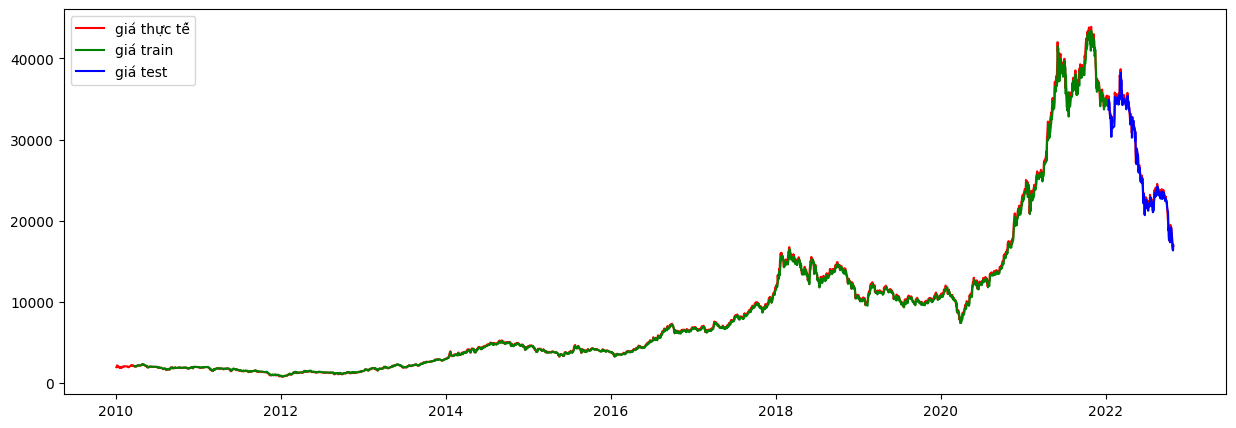

In [100]:
#Lập biểu đồ so sánh
train_data1=df1[50:3000]
test_data1=df1[3000: ]

train_data1['dự đoán']=y_train_predict 
test_data1['dự đoán']=y_test_predict
plt.figure(figsize=(15,5))
plt.plot(df1,label='giá thực tế',color='red')
plt.plot(train_data1['dự đoán'],label='giá train',color='green')
plt.plot(test_data1['dự đoán'],label='giá test',color='blue')
plt.title='Dự Đoán Giá Chứng Khoán HÒA PHÁT'
plt.xlabel='Thời Gian'
plt.ylabel='Giá Cổ Phiếu Đóng Cửa'
plt.legend()
plt.show()

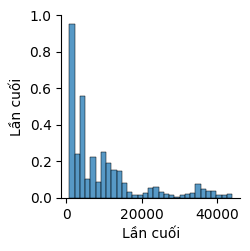

In [101]:
sns.pairplot(df1)

In [102]:
#r2
print('độ phù hợp tập train',r2_score(y_train,y_train_predict))
#mae
print('sai số tuyệt đối trung bình tập train',mean_absolute_error(y_train,y_train_predict))
#mape
print('phần trăm sai số tuyệt đối trung bình tập train',mean_absolute_percentage_error(y_train,y_train_predict))

độ phù hợp tập train 0.9988203803094643
sai số tuyệt đối trung bình tập train 170.61496060232392
phần trăm sai số tuyệt đối trung bình tập train 0.02013546429516187


In [103]:
train_data1

,Lần cuối,dự đoán
Ngày,,
2010-03-22,2105.8,2153.649658
2010-03-23,2089.6,2126.648682
2010-03-24,2105.8,2108.551758
2010-03-25,2057.2,2116.552246
2010-03-26,2073.4,2082.238037
...,...,...
2022-01-05,35419.4,34925.210938
2022-01-06,34889.6,34929.964844
2022-01-07,34662.5,34363.875000


In [104]:
px.line(train_data1, y=['dự đoán','Lần cuối'],title='BIỂU ĐỒ GIÁ TRAIN HÒA PHÁT')

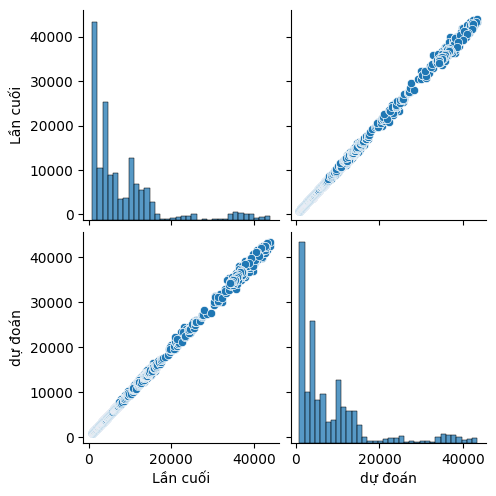

In [105]:
sns.pairplot(train_data1)

In [106]:
#r2
print('độ phù hợp tập test',r2_score(y_test,y_test_predict))
#mae
print('sai số tuyệt đối trung bình tập test',mean_absolute_error(y_test,y_test_predict))
#mape
print('phần trăm sai số tuyệt đối trung bình tập test',mean_absolute_percentage_error(y_test,y_test_predict))

độ phù hợp tập test 0.9857210135402152
sai số tuyệt đối trung bình tập test 536.3910794005103
phần trăm sai số tuyệt đối trung bình tập test 0.01991765226119922


In [107]:
test_data1

,Lần cuối,dự đoán
Ngày,,
2022-01-12,34965.3,33710.578125
2022-01-13,35343.7,34714.382812
2022-01-14,35003.1,34900.261719
2022-01-17,33830.0,34456.218750
2022-01-18,33300.3,33288.519531
...,...,...
2022-10-20,18100.0,18216.029297
2022-10-21,16900.0,17940.955078
2022-10-24,16400.0,16835.615234


In [108]:
px.line(test_data1, y=['dự đoán','Lần cuối'],title='BIỂU ĐỒ GIÁ TEST HÒA PHÁT')

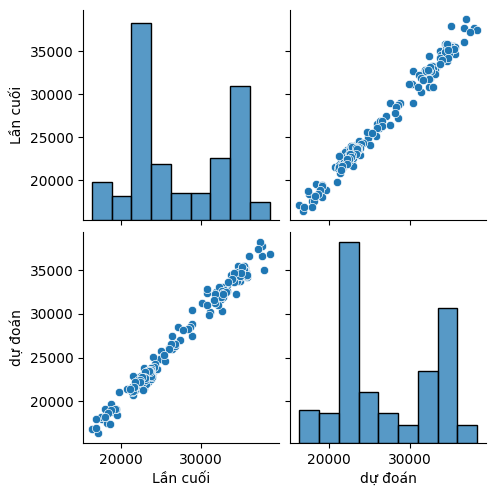

In [109]:
sns.pairplot(test_data1)

In [110]:
#dự đoán giá 1 ngày trong tương lai

#tạo tập mới
new_df=df.filter(['Lần cuối'])
#tạo giá trị trong 200 ngày qua thành 1 mảng
last_200=new_df[-200:].values
#chia tỉ lệ thành giá trị từ 0 đến 1
last_200_scaler=sc.transform(last_200)

In [111]:
#tạo danh sách trống
Xnew_test=[]
#nối dữ liệu 200 ngày với nhau
Xnew_test.append(last_200_scaler)
#chuyển đổi dữ liệu Xnew_test thành mảng numpy
Xnew_test=np.array(Xnew_test)
#định hình lại dữ liệu
Xnew_test=np.reshape(Xnew_test,(Xnew_test.shape[0],Xnew_test.shape[1],1))
#nhận mức giá dự đoán theo tỉ lệ
predict_price=final_model.predict(Xnew_test)
#hoàn tác việc chia tỉ lệ
predict_price=sc.inverse_transform(predict_price)
print(predict_price)

1/1 [==============================] - 1s 739ms/step
[[16726.887]]
